In [1]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.naive_bayes
import sklearn.ensemble as ske
import sklearn.neighbors
import sklearn.pipeline
import sklearn.linear_model
import joblib
from sklearn import preprocessing
from sklearn import tree, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif

import sys
import sqlite3
import importlib
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Activation, Flatten, Input, Multiply, Dropout, GlobalMaxPooling1D, GlobalAveragePooling1D, AveragePooling1D
from keras.models import Sequential, Model #for keras sequential model
from keras import optimizers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
df_wild = pd.read_pickle('/kaggle/input/wild-pickle/wild.pickle')

In [4]:
MAX_LENGTH = int(1e6)
prev_size = len(df_wild)
df_wild = df_wild[df_wild['generic_fileSize'] <= MAX_LENGTH]
print("considering samples with size less than {} bytes, {} ----> {}".format(MAX_LENGTH, prev_size, len(df_wild)))

considering samples with size less than 1000000 bytes, 50724 ----> 37354


In [5]:
print(df_wild.shape)

(37354, 56555)


In [6]:
df_wild.head()

,sample_sha1,benign,malicious,packed,unpacked_sample_sha1,unpacked_sample_id,packer_name,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
1,a2aac23e17be570c647fd22080e05b0e58449565,True,False,True,-1,-1,none,False,False,False,...,0.000022,0.0,0.000088,0.000084,0.000070,0.000066,0.000028,0.0,0.000053,0.0
2,c3aa534bbd20f3a3dd8e7a457f625291af9d0fe4,False,True,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000309,0.000000,0.000000,0.0,0.000331,0.0
10,15cb9eab6b0f0ccd718a9235f07046dff100789f,False,True,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
12,8792cf08950abada1572b47948e86c9fce26c01a,True,False,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
13,353a955ae9919f7b639d74394e3c1149f0189362,True,False,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000204,0.000190,0.000066,0.000091,0.000000,0.0,0.000000,0.0


In [7]:
#Chọn ngẫu nhiên 1,200 mẫu
df = df_wild.sample(n=1200, random_state=102)

In [8]:
# Loại bỏ các lables không cần thiết
df = df.drop(['sample_sha1','unpacked_sample_sha1','unpacked_sample_id'], axis=1)
df = df.drop(['benign_vt','malicious_vt'], axis=1)
df = df.drop(['benign','packer_name','source','similarity','most_similar_sha1','unpacked_similarity'], axis=1)

In [9]:
#Loại bỏ một số cột dạng string không thể xử lý
string_columns = df.select_dtypes(include=['object']).columns
df = df.drop(string_columns, axis=1)

In [10]:
df.head()

,malicious,packed,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,imp_?append@?$basic_string@du?$char_traits@d@std@@v?$allocator@d@2@@std@@qaeaav12@abv12@ii@z,imp_zwwritefile,imp_glstencilop,imp_comparelinkinforeferents,imp__setmbcp,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
32148,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000187,0.000198,0.0,0.0,0.0,0.0,0.0,0.0
210953,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50313,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
200288,True,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49579,True,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(df.shape)

(1200, 56524)


In [12]:
df_train = df.sample(n=1000, random_state=102)
df_test = df.drop(df_train.index)

In [13]:
#Vì tập dữ liệu không có Unpacked Malware, chỉ cần loại bỏ Packed Benign
data = df_train.drop(df_train[(df_train['malicious'] == False) & (df_train['packed'] == True)].index)

In [14]:
#Kiểm tra số lượng mẫu
Unpacked_Benign = data[(data['malicious'] == False) & (data['packed'] == False)].shape[0]
Packed_Malware = data[(data['malicious'] == True) & (data['packed'] == True)].shape[0]
print('Unpacked Benign: %i samples' % Unpacked_Benign)
print('Packed Malware: %i samples' % Packed_Malware)
print('Total TRAIN set: %i samples'% (Unpacked_Benign+Packed_Malware))

Unpacked Benign: 73 samples
Packed Malware: 727 samples
Total TRAIN set: 800 samples


In [15]:
#Chia tỉ lệ 50 - 50
data_PM = data[(data['malicious'] == True) & (data['packed'] == True)].sample(n=Packed_Malware-Unpacked_Benign, random_state=102)
data = data.drop(data_PM.index)

In [16]:
#Số lượng tập train
Unpacked_Benign = data[(data['malicious'] == False) & (data['packed'] == False)].shape[0]
Packed_Malware = data[(data['malicious'] == True) & (data['packed'] == True)].shape[0]
print('Unpacked Benign: %i samples' % Unpacked_Benign)
print('Packed Malware: %i samples' % Packed_Malware)
print('Total TRAIN set: %i samples'% (Unpacked_Benign+Packed_Malware))

Unpacked Benign: 73 samples
Packed Malware: 73 samples
Total TRAIN set: 146 samples


In [17]:
y = data['malicious'].values
data = data.drop(['malicious','packed'], axis=1)

In [18]:
Unpacked_Benign = df_test[(df_test['malicious'] == False) & (df_test['packed'] == False)].shape[0]
Packed_Malware = df_test[(df_test['malicious'] == True) & (df_test['packed'] == True)].shape[0]
Packed_Benign = df_test[(df_test['malicious'] == False) & (df_test['packed'] == True)].shape[0]

df_test_PM = df_test[(df_test['malicious'] == True) & (df_test['packed'] == True)].sample(n=(Packed_Malware-(Unpacked_Benign+Packed_Benign)), random_state=102)
df_test = df_test.drop(df_test_PM.index)

Unpacked_Benign = df_test[(df_test['malicious'] == False) & (df_test['packed'] == False)].shape[0]
Packed_Malware = df_test[(df_test['malicious'] == True) & (df_test['packed'] == True)].shape[0]
Packed_Benign = df_test[(df_test['malicious'] == False) & (df_test['packed'] == True)].shape[0]

print('Unpacked Benign: %i samples' % Unpacked_Benign)
print('Packed Malware: %i samples' % Packed_Malware)
print('Packed Benign: %i samples' % Packed_Benign)
print('Total TEST set: %i samples'% (Unpacked_Benign+Packed_Malware+Packed_Benign))

Unpacked Benign: 10 samples
Packed Malware: 46 samples
Packed Benign: 36 samples
Total TEST set: 92 samples


In [19]:
fsel = SelectKBest(score_func=mutual_info_classif, k=100)
fsel.fit(data, y)
features = fsel.get_support(indices = True)
features = [column for column in data.columns[features]]

In [20]:
# model = SelectFromModel(fsel, prefit=True)
# X = model.transform(data)

X_train = fsel.transform(data)
X_test = fsel.transform(df_test.drop(['malicious','packed'], axis=1))

# Lấy tên đặc trưng tương ứng cho X_train và X_test
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

y_train = y
y_test = df_test['malicious'].values

In [21]:
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape
X_train_new = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_new = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

In [22]:
n_timesteps, n_features = X_train_new.shape[1], X_train_new.shape[2]

In [23]:
def Cnn():
    model = Sequential()
    model.add(Input(shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=256, kernel_size=2, activation='relu', name="Conv1D_1"))
    model.add(Activation('sigmoid'))
    model.add(Conv1D(filters=256, kernel_size=2, name="Conv1D_2"))  
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Conv1D(filters=128, kernel_size=3, name="Conv1D_3"))
    model.add(Conv1D(filters=128, kernel_size=3, name="Conv1D_4"))
    model.add(AveragePooling1D(2))
    model.add(Conv1D(filters=64, kernel_size=4, name="Conv1D_5"))
    model.add(Conv1D(filters=64, kernel_size=4, name="Conv1D_6"))
    model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dense(64, activation='relu', name="Dense_1"))
    model.add(Dropout(0.35))
    model.add(Dense(1, activation='sigmoid', name="Dense_2"))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [24]:
CNN_model = Cnn()
#print the model summary
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 99, 256)           768       
                                                                 
 activation (Activation)     (None, 99, 256)           0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 98, 256)           131328    
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 49, 256)          0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 47, 128)           98432     
                                                                 
 Conv1D_4 (Conv1D)           (None, 45, 128)           49280     
                                                                 
 average_pooling1d (AverageP  (None, 22, 128)          0

Epoch 1/100
3/3 - 3s - loss: 1.0707 - accuracy: 0.6027 - val_loss: 1.6335 - val_accuracy: 0.5000 - 3s/epoch - 912ms/step
Epoch 2/100
3/3 - 0s - loss: 1.6765 - accuracy: 0.5068 - val_loss: 0.7508 - val_accuracy: 0.5000 - 317ms/epoch - 106ms/step
Epoch 3/100
3/3 - 0s - loss: 1.1297 - accuracy: 0.4863 - val_loss: 0.7857 - val_accuracy: 0.5000 - 303ms/epoch - 101ms/step
Epoch 4/100
3/3 - 0s - loss: 0.7643 - accuracy: 0.5479 - val_loss: 0.7850 - val_accuracy: 0.5000 - 320ms/epoch - 107ms/step
Epoch 5/100
3/3 - 0s - loss: 0.7660 - accuracy: 0.4863 - val_loss: 0.6338 - val_accuracy: 0.6848 - 303ms/epoch - 101ms/step
Epoch 6/100
3/3 - 0s - loss: 0.6949 - accuracy: 0.6096 - val_loss: 0.6222 - val_accuracy: 0.6848 - 295ms/epoch - 98ms/step
Epoch 7/100
3/3 - 0s - loss: 0.7162 - accuracy: 0.6438 - val_loss: 0.6238 - val_accuracy: 0.6848 - 296ms/epoch - 99ms/step
Epoch 8/100
3/3 - 0s - loss: 0.6775 - accuracy: 0.6164 - val_loss: 0.6250 - val_accuracy: 0.6087 - 306ms/epoch - 102ms/step
Epoch 9/100
3

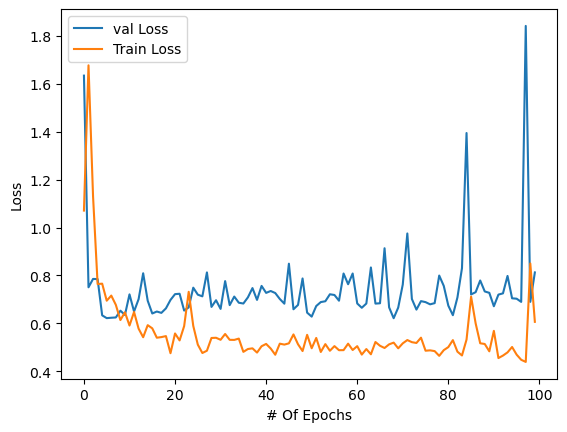

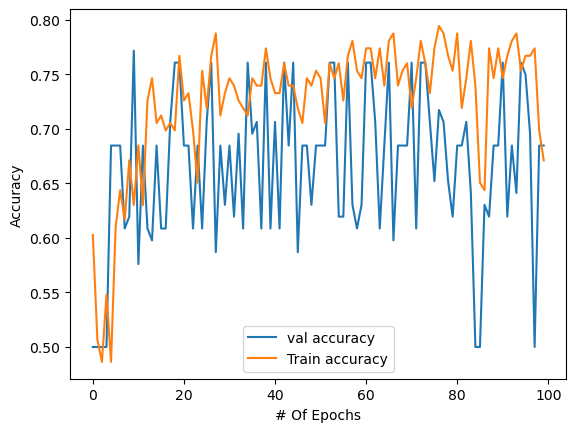

In [25]:
history_cnn = CNN_model.fit(X_train_new, y_train, epochs=100, batch_size=64, validation_data=(X_test_new,y_test), verbose=2)

#for plotting losses curve
loss_training = history_cnn.history['loss']
loss_test = history_cnn.history['val_loss']

#for plotting accyracies curve
accuracy_training = history_cnn.history['accuracy']
accuracy_test = history_cnn.history['val_accuracy']

loss_training = history_cnn.history['loss']
loss_test = history_cnn.history['val_loss']

accuracy_training = history_cnn.history['accuracy']
accuracy_test = history_cnn.history['val_accuracy']

#for Plotting
plt.plot(loss_test)
plt.plot(loss_training)

#set the titles of losses plot
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

#set the titles of accuracies plot
plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

In [26]:
#calculate and print the validation accuracy
scores = CNN_model.evaluate(X_train_new, y_train)
print('Final validation accuraccy: ')
print("Loss:", scores[0], " Accuracy:", scores[1])

5/5 [==============================] - 0s 17ms/step - loss: 0.5036 - accuracy: 0.7466
Final validation accuraccy: 
Loss: 0.503632664680481  Accuracy: 0.7465753555297852


In [27]:
#calculate and print the testing accuracy
scores_test = CNN_model.evaluate(X_test_new, y_test)
print('Final testing accuraccy: ')
print("Loss:", scores_test[0], " Accuracy:", scores_test[1])

3/3 [==============================] - 0s 21ms/step - loss: 0.8128 - accuracy: 0.6848
Final testing accuraccy: 
Loss: 0.8128096461296082  Accuracy: 0.6847826242446899


In [28]:
#make the model prediction
pred = CNN_model.predict(X_test_new)

3/3 [==============================] - 0s 16ms/step


In [29]:
Y_pred = (pred > 0.5) * 1.0
Y_pred = Y_pred.reshape(y_test.shape)

In [30]:
report = metrics.classification_report(y_test, Y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.85      0.73        46
        True       0.77      0.52      0.62        46

    accuracy                           0.68        92
   macro avg       0.71      0.68      0.68        92
weighted avg       0.71      0.68      0.68        92



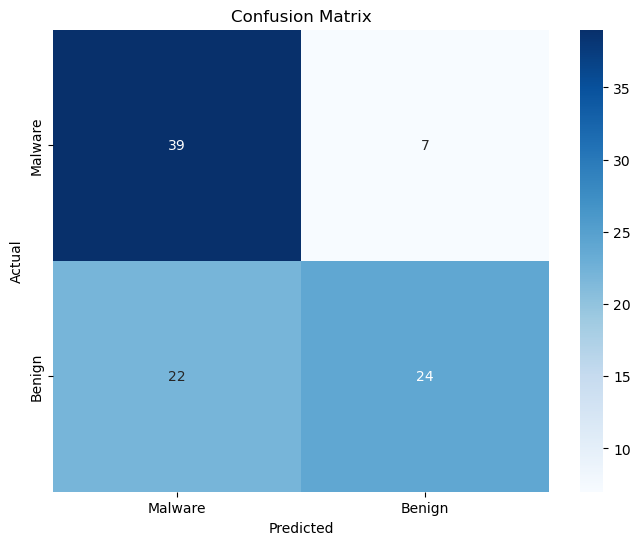

In [31]:
class_labels = list(X_test_new)
import seaborn as sns
cm = confusion_matrix(y_test, Y_pred)

# Hiển thị confusion matrix bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malware', 'Benign'],
            yticklabels=['Malware', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()